In [97]:
import torch
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, MultiStepLR
import numpy as np
import matplotlib.pyplot as plt
from math import *
import time
import copy


# %%
torch.set_default_tensor_type('torch.DoubleTensor')

In [98]:
dimension = 4
input_width,layer_width = dimension, 4
layer_depth = 5
epoch = 10000
import pickle
# layer_width_list = [4,40,200,300,1000,2000,3000]
nu_list = [0.01,0.1,0.5,1]


In [99]:
def plot_loss_epoch(loss_record_all, error_record_all,epoch, var_loss, var_error,layer_width):
    para = 2 * layer_width * layer_width + 10 * layer_width + 3
    fig = plt.figure()
    # Set subplots size
    fig.set_figheight(6)
    fig.set_figwidth(7)

    ax = fig.add_subplot(2, 1, 1)

    for i in range(len(nu_list)):
        ax.plot(np.arange(epoch), loss_record_all[i])
        ax.errorbar(np.arange(epoch), loss_record_all[i], yerr=var_loss[i], label='nu = {}'.format(nu_list[i]))

    ax.set_ylabel('Empirical loss')
    ax.set_title("Empirical loss for 3D Burgers' equation, para: {}, model=boundary-include".format(para))
    ax.set_yscale("log")
    ax.legend()

    ax = fig.add_subplot(2, 1, 2)
    for i in range(len(nu_list)):
        ax.plot(np.arange(epoch), error_record_all[i])
        ax.errorbar(np.arange(epoch), error_record_all[i], yerr=var_error[i], label='nu = {}'.format(nu_list[i]))

    ax.set_xlabel('epoch')
    ax.set_ylabel('Fractional error w.r.t true solution')
    ax.set_title("Fractional error w.r.t true solution, para: {},model=boundary-include".format(para))
    ax.set_yscale("log")
    ax.legend()

    plt.savefig('loss_epoch,3D, epoch = 30000, para: {}, lr = 0.0001,data_size=3000,model=boundary-include.png'.format(para))



In [100]:
def plot_loss_epoch2(loss_record_all, error_record_all,epoch, var_loss, var_error,nu):
    para = nu
    fig = plt.figure()
    # Set subplots size
    fig.set_figheight(6)
    fig.set_figwidth(7)

    ax = fig.add_subplot(2, 1, 1)
    # plot a smooth curve of loss
    ax.plot(np.arange(epoch), loss_record_all[0])
    ax.plot(np.arange(epoch), loss_record_all[1])
    ax.plot(np.arange(epoch), loss_record_all[2])
    # append error bar to the plot 
    ax.errorbar(np.arange(epoch), loss_record_all[0], yerr=var_loss[0], label='vanilla')
    ax.errorbar(np.arange(epoch), loss_record_all[1], yerr=var_loss[1], label='boundary-included')
    ax.errorbar(np.arange(epoch), loss_record_all[2], yerr=var_loss[2], label='initial-included')

    # ax.set_xlabel('epoch')
    ax.set_ylabel('Empirical loss')
    ax.set_title("Empirical loss for 3D Burgers' equation, nu: {}, data_size = 3000".format(para))
    ax.set_yscale("log")
    ax.legend()

    ax = fig.add_subplot(2, 1, 2)
    # plot a smooth curve of loss
    ax.plot(np.arange(epoch), error_record_all[0])
    ax.plot(np.arange(epoch), error_record_all[1])
    ax.plot(np.arange(epoch), error_record_all[2])
    # append error bar to the plot
    ax.errorbar(np.arange(epoch), error_record_all[0], yerr=var_error[0], label='vanilla')
    ax.errorbar(np.arange(epoch), error_record_all[1], yerr=var_error[1], label='boundary-included')
    ax.errorbar(np.arange(epoch), error_record_all[2], yerr=var_error[2], label='initial-included')

    ax.set_xlabel('epoch')
    ax.set_ylabel('Fractional error w.r.t true solution')
    ax.set_title("Fractional error w.r.t true solution, nu: {},data_size = 3000".format(para))
    ax.set_yscale("log")
    ax.legend()

    plt.savefig('loss_epoch,3D, epoch = 30000, nu: {}, lr = 0.0001,data_size = 3000.png'.format(para))



In [110]:
import pickle

# with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=0.01width=4.pkl', 'rb') as f:
#     a = pickle.load(f)
# with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=0.1width=4.pkl', 'rb') as f:
#     b = pickle.load(f)
# with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=0.5width=4.pkl', 'rb') as f:
#     c = pickle.load(f)
# with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=1width=4.pkl', 'rb') as f:
#     d = pickle.load(f)

with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=0.01width=40.pkl', 'rb') as f:
    a = pickle.load(f)
with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=0.1width=40.pkl', 'rb') as f:
    b = pickle.load(f)
with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=0.5width=40.pkl', 'rb') as f:
    c = pickle.load(f)
with open('/Users/fangzhihao/Desktop/曼大PDF/year3sem2/project/test6/burger3/notebook5/3D_burger_loss_record_all_nu=1width=40.pkl', 'rb') as f:
    d = pickle.load(f)



print(len(a))


2


In [111]:
print(len(d[0]))
print(len(d[0][0]))
print(len(d[1][2][2]))
# get d[0][0][0] to first 10000 data
for i in range(2):
    for j in range(3):
        for k in range(3):
            d[i][j][k] = d[i][j][k][:10000]

3
3
10000


In [112]:
# loss_record_all = [a[0][0],b[0][0],c[0][0],d[0][0]]
# error_record_all = [a[1][0],b[1][0],c[1][0],d[1][0]]
# loss_record_all = [a[0][1],b[0][1],c[0][1],d[0][1]]
# error_record_all = [a[1][1],b[1][1],c[1][1],d[1][1]]

loss_record_all = [a[0][2],b[0][2],c[0][2],d[0][2]]
error_record_all = [a[1][2],b[1][2],c[1][2],d[1][2]]

In [113]:
# loss_record_all = c[0]
# error_record_all =c[1]
avg_loss_record = []
avg_error_record = []

var_error_record = []
var_loss_record = []
for i in range(len(loss_record_all)):
    avg_loss_record.append(np.mean(loss_record_all[i], axis=0))
    avg_error_record.append(np.mean(error_record_all[i], axis=0))
    var_error_record.append(np.var(error_record_all[i], axis=0))
    var_loss_record.append(np.var(loss_record_all[i], axis=0))

# plot_loss_epoch(avg_loss_record, avg_error_record, epoch,var_loss_record, var_error_record,40)

In [114]:
print(avg_error_record[0][-1])  
print(avg_error_record[1][-1])
print(avg_error_record[2][-1])
print(avg_error_record[3][-1])


0.009836816699405592
0.005976832166903267
0.03527980988850899
0.18208577404566165


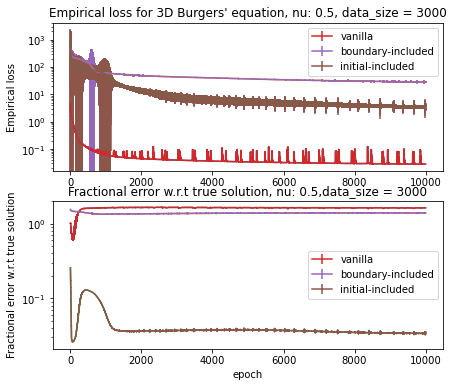

In [103]:
plot_loss_epoch2(avg_loss_record, avg_error_record, epoch,var_loss_record, var_error_record,0.5)